# Layer Explaination

In [1]:
import tensorflow as tf

## Input Image
input으로 들어갈 DataSet을 들여다보면서 시각화까지
패키지 로드
- os
- glob
- matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

- 이미지 데이터셋을 불러온다
- 이미지 데이터셋을 불러오면, 차원, shape, channel 등 확인 꼭 필요 
- Convolution에 들어갈 이미지는 [batch_size, height, width, channel]

In [3]:
from tensorflow.keras import datasets
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
image = train_x[0]
image.shape

(28, 28)

In [4]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

## Feature Extraction
### Convolution
- filter: layer에서 나갈 때 몇 개의 filter를 만들 것인지(a.k.a weight, filter, channels), filter 갯수만큼 channel 수가 변경된다.
- kernel_size: filter(Weight)의 사이즈
- strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지(사이즈에도 영향을 줌)
- padding:zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음(사이즈에도 영향을 줌)
- activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [5]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation='relu')

(3, 3) 대신에 3으로 대체 가능

In [6]:
tf.keras.layers.Conv2D(3, 3, 1, 'SAME')

## Visualization
- tf.keras.layers.Conv2D

In [7]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [8]:
layer = tf.keras.layers.Conv2D(5, 3, 1, padding='SAME')
layer

In [9]:
output = layer(image)
output
# filter의 수를 5로해서 channel수가 5로 변경됨

<tf.Tensor: id=29, shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
        

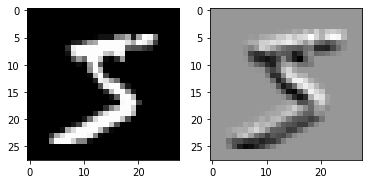

In [10]:
# convolution을 수행하기 전 이미지와 수행한 후 이미지를 비교한다. 
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1, 2, 2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

In [11]:
# 원본 이미지와 Feature map 이미지 비교
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [12]:
np.min(output), np.max(output)

(-340.59604, 217.21718)

## Weight 불러오기
- layer.get_weights() : list로 반환된다.(2 length)
- 첫번째는 weight이고 두번째는 bias이다.

In [13]:
weight = layer.get_weights()
weight

[array([[[[-0.26903915, -0.21734452,  0.14665309,  0.31737497,
            0.22879419]],
 
         [[-0.31830686,  0.32231835,  0.06264257, -0.22844157,
           -0.19921558]],
 
         [[-0.2616858 ,  0.029394  ,  0.0379397 , -0.18579452,
            0.25595263]]],
 
 
        [[[ 0.21283951, -0.01634702,  0.12151638, -0.23414771,
            0.19901118]],
 
         [[ 0.26155862, -0.16319904,  0.01389727, -0.12427799,
            0.24302652]],
 
         [[-0.30827063,  0.27229288, -0.2338644 ,  0.1275548 ,
           -0.32669616]]],
 
 
        [[[ 0.32719186,  0.19476178, -0.29089707, -0.21910024,
           -0.14282474]],
 
         [[-0.10437243,  0.27636245, -0.17281938, -0.22992556,
            0.23144105]],
 
         [[ 0.17679253, -0.05712175, -0.06808957, -0.32433814,
            0.01894641]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [14]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

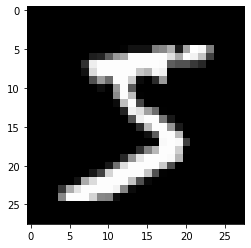

In [15]:
plt.imshow(image[0, :, :, 0], 'gray')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

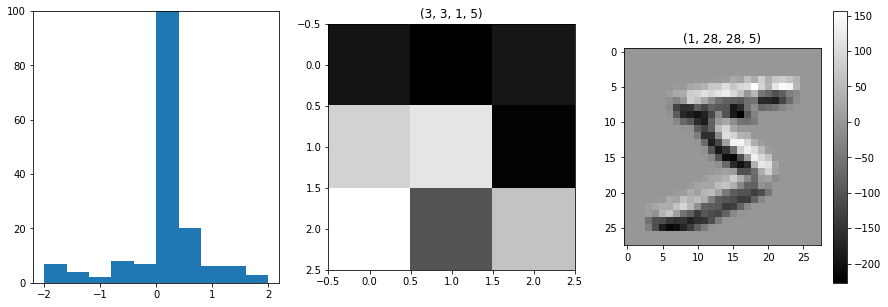

In [16]:
# 위 이미지가 필터를 거치면서 다음 이미지로 변환
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show

## Activation

In [17]:
import numpy as np
np.min(output), np.max(output)
# relu를 이용해 0미만은 모두 없앵줌

(-340.59604, 217.21718)

In [18]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)
act_output

<tf.Tensor: id=48, shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
        

In [19]:
np.min(act_output)

0.0

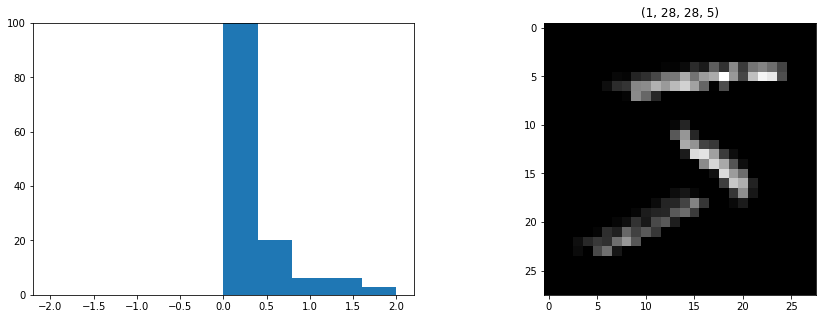

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.show()

## Pooling
이미지에서 window사이즈 안에 특정한 값만 추출하여 이미지를 사이즈를 줄임.

In [21]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [22]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [23]:
pool_output.shape

TensorShape([1, 14, 14, 5])

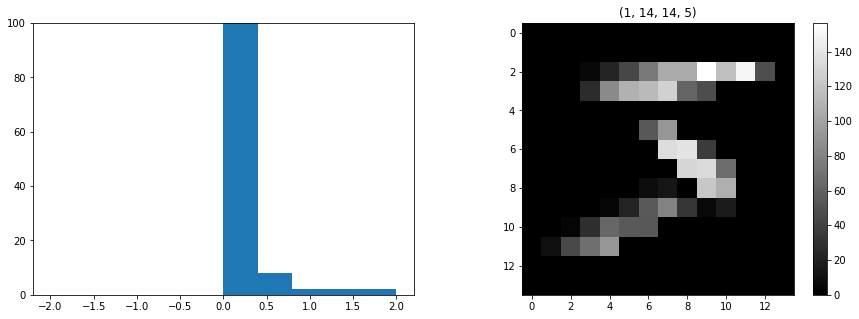

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Classification
## Fully Connected

In [26]:
#y = wX+b

#### Faltten
다차원을 1차원으로 변경: Flattening이라고 함

In [27]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [28]:
output.shape

TensorShape([1, 28, 28, 5])

In [29]:
flatten.shape
# 1은 batch_size로 이미지가 여러장일 경우 값이 변함

TensorShape([1, 3920])

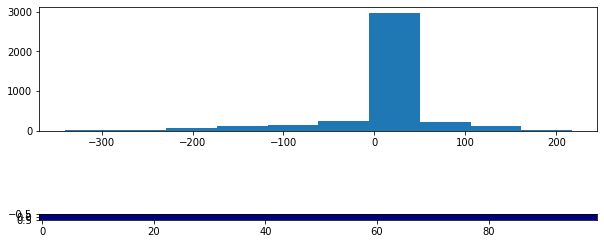

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100], 'jet')
plt.show()

## Dense
- tf.keras.layers.Dense

In [31]:
# 32는 노드의 갯수
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)
output.shape

TensorShape([1, 32])

In [32]:
# 32개 노드에서 10개 노드로 연결한다.
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_example = layer_2(output)
output_example.shape

TensorShape([1, 10])

## Dropout
- 학습할때만 적되고 평가할 때는 Fully Connected로 수행한다.
- tf.keras.layers.Dropout(얼마나 살릴지 비율)

In [33]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)
output.shape

TensorShape([1, 32])

In [34]:
from tensorflow.keras import layers
# tensorflow.keras 을 layers로 임포트해서 담부터는 줄여쓸수있음

In [35]:
input_shape = (28, 28, 1)
num_classes = 10

In [36]:
inputs = tf.keras.layers.Input(input_shape)

# Feature Extraction
# 첫 번째 Convolution Block
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

# 두 번째 Convolution Block
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name="Basic CNN")

In [37]:
model.summary()
# batch size를 정해주지 않아 None으로 표시됨

Model: "Basic CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0 